In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import seaborn as sns

In [2]:
exp_dir = r"E:\ExperimentData\Imaging\2025_06_09_CALORIMETRIC_EXP\Images"
folder_start = 6
folder_end = 29

In [8]:
folder_list = [ele for ele in os.listdir(exp_dir) if os.path.isdir(exp_dir + "/" + ele)]

In [45]:
d = {}
for folder in folder_list:
    if int(folder) >= folder_start and int(folder) <= folder_end:
        file_path = exp_dir + "/" + folder + r"\TIFF"  + "/Ref.tif"
        ret, img = cv2.imreadmulti(file_path)
        img = img[0]
        b = img[:,:,0]
        g = img[:,:,1]
        r = img[:,:,2]
        d[int(folder)] = [np.mean(b).round(2), np.mean(g).round(2), np.mean(r).round(2)]

In [50]:
res = pd.DataFrame.from_dict(d, columns = ['b', 'g', 'r'], orient='index')
res.to_csv('res.csv')

<Axes: ylabel='Count'>

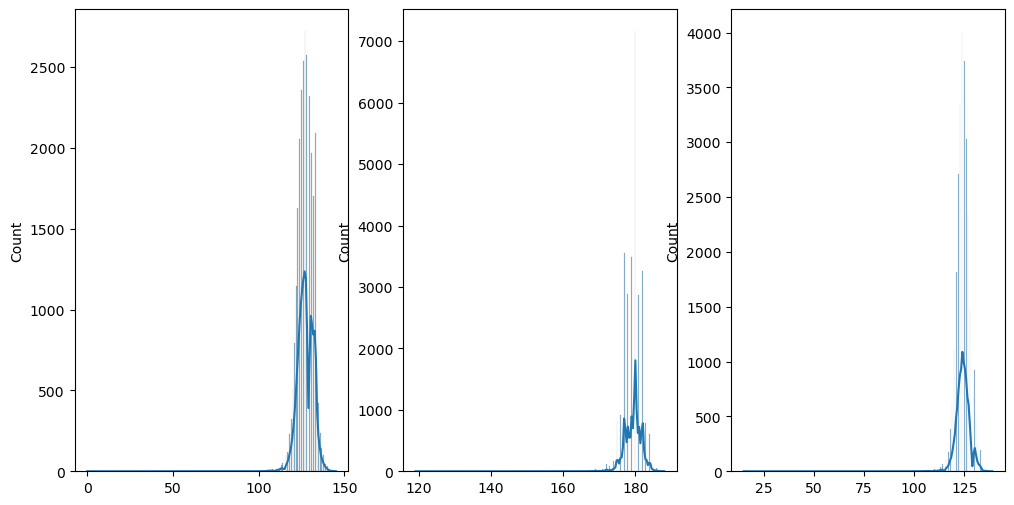

In [38]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.histplot(r.flatten(), kde=True)
plt.subplot(1,3,2)
sns.histplot(g.flatten(), kde=True)
plt.subplot(1,3,3)
sns.histplot(b.flatten(), kde=True)

In [51]:
from mpl_toolkits.mplot3d import Axes3D

In [101]:
def plot_3d(x, y, z, labels, tit=''):
    # Create a figure and 3D axis
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')

    # Create scatter plot
    ax.scatter3D(x, y, z, color='red', marker='o')
    for i in range(len(x)):
        ax.text(x[i], y[i], z[i], labels[i], fontsize=10, color='black')
    # Labels
    ax.set_xlabel('B Axis')
    ax.set_ylabel('G Axis')
    ax.set_zlabel('R Axis')
    ax.set_title(tit)
    plt.tight_layout()

Distance:  3887.3443666666667


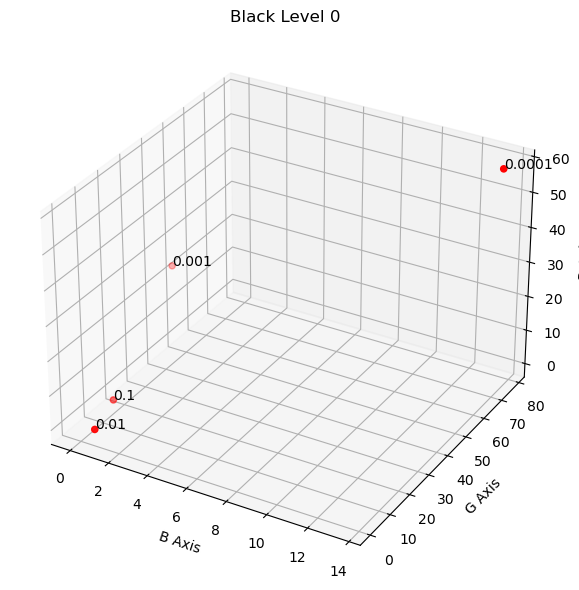

In [103]:
rows = [10,12,14,16] #Black level=0
labels = [0.1, 0.01, 0.001, 0.0001]
selected_res = res.loc[rows]
plot_3d(selected_res['b'].to_numpy(), selected_res['g'].to_numpy(), selected_res['r'].to_numpy(), labels, "Black Level 0")

print("Distance: ", compute_dist(selected_res))

Distance:  5182.403799999999


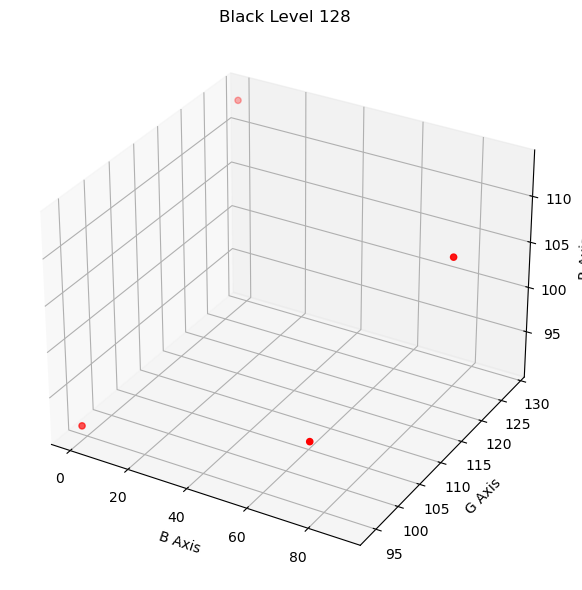

In [95]:
rows = np.arange(18,22) #Black level=128
# labels = []
selected_res = res.loc[rows]
plot_3d(selected_res['b'].to_numpy(), selected_res['g'].to_numpy(), selected_res['r'].to_numpy(), labels, "Black Level 128")
print("Distance: ", compute_dist(selected_res))

Distance:  2946.8111000000004


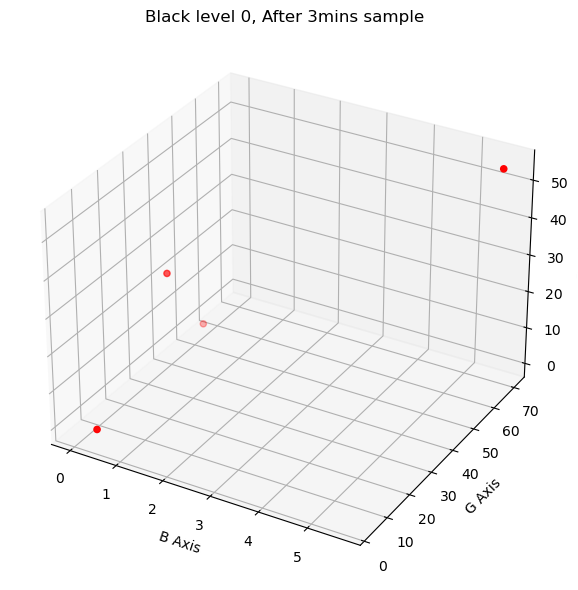

In [98]:
rows = [11, 13, 15, 17] #Black level=0, After 3mins sample
selected_res = res.loc[rows]
plot_3d(selected_res['b'], selected_res['g'], selected_res['r'], "Black level 0, After 3mins sample")
print("Distance: ", compute_dist(selected_res))

Distance:  4414.424233333334


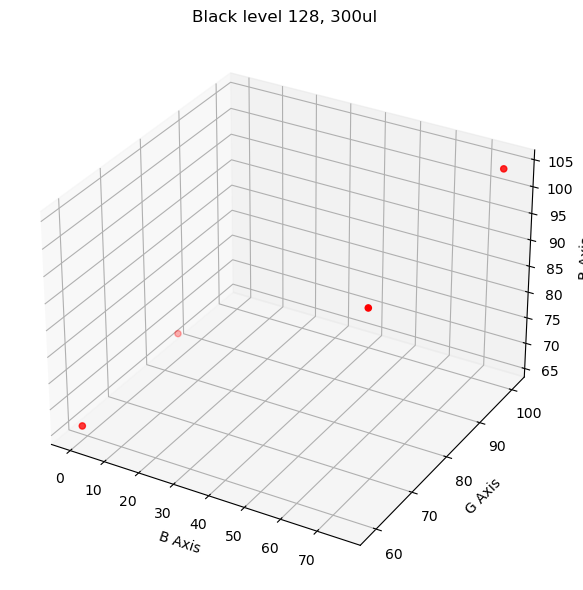

In [92]:
rows = [22, 24, 26, 28] #Black level=128, 300ul
selected_res = res.loc[rows]
plot_3d(selected_res['b'], selected_res['g'], selected_res['r'], "Black level 128, 300ul")
print("Distance: ", compute_dist(selected_res))

Distance:  2051.47895


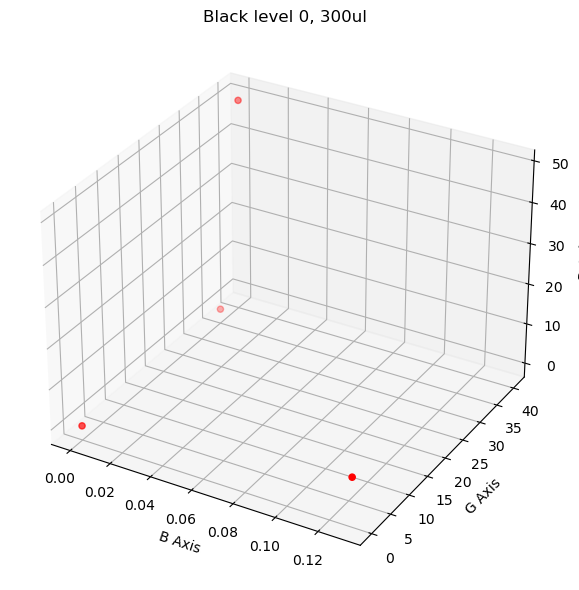

In [91]:
rows = [23, 25, 27, 29] #Black level=0, 300ul
selected_res = res.loc[rows]
plot_3d(selected_res['b'], selected_res['g'], selected_res['r'], "Black level 0, 300ul")
print("Distance: ", compute_dist(selected_res))

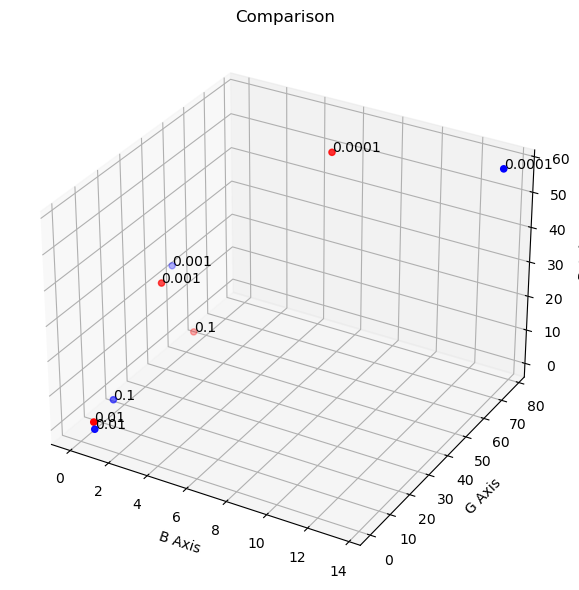

In [104]:


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

# Create scatter plot
rows = [11, 13, 15, 17] #Black level=0, 300ul
labels = [0.1, 0.01, 0.001, 0.0001]
selected_res = res.loc[rows]
ax.scatter3D(selected_res['b'], selected_res['g'], selected_res['r'], color='red', marker='o')
x = selected_res['b'].to_numpy()
y = selected_res['g'].to_numpy()
z = selected_res['r'].to_numpy()
for i in range(len(x)):
    ax.text(x[i], y[i], z[i], labels[i], fontsize=10, color='black')
# Create scatter plot
rows = [10, 12, 14, 16] #Black level=0, 300ul
selected_res = res.loc[rows]
x = selected_res['b'].to_numpy()
y = selected_res['g'].to_numpy()
z = selected_res['r'].to_numpy()
ax.scatter3D(selected_res['b'], selected_res['g'], selected_res['r'], color='blue', marker='o')
for i in range(len(x)):
    ax.text(x[i], y[i], z[i], labels[i], fontsize=10, color='black')
# Labels
ax.set_xlabel('B Axis')
ax.set_ylabel('G Axis')
ax.set_zlabel('R Axis')
ax.set_title("Comparison")
plt.tight_layout()

In [90]:
def compute_dist(df):
    points = df.to_numpy()
    diffs = points[:, np.newaxis, :] - points[np.newaxis, :, :]
    squared_dists = np.sum(diffs ** 2, axis=-1)

    # Exclude diagonal (self-distances = 0)
    n = len(points)
    average_squared_distance = np.sum(squared_dists) / (n * (n - 1))
    return average_squared_distance

In [112]:
d = {}
d['mit_5'] = {}
d['mit_5']['nation'] = 'indian'
d['mit_5']['candidate'] = 'muthu'
d.keys()

dict_keys(['mit_5'])

In [114]:
pd.DataFrame.from_dict(d, orient='index')

,nation,candidate
mit_5,indian,muthu


In [88]:
diffs

array([[[  0.  ,   0.  ,   0.  ],
        [ -0.13,  40.25,  40.57],
        [  0.  ,  40.38,  49.  ],
        [  0.  ,   5.34,  48.94]],

       [[  0.13, -40.25, -40.57],
        [  0.  ,   0.  ,   0.  ],
        [  0.13,   0.13,   8.43],
        [  0.13, -34.91,   8.37]],

       [[  0.  , -40.38, -49.  ],
        [ -0.13,  -0.13,  -8.43],
        [  0.  ,   0.  ,   0.  ],
        [  0.  , -35.04,  -0.06]],

       [[  0.  ,  -5.34, -48.94],
        [ -0.13,  34.91,  -8.37],
        [  0.  ,  35.04,   0.06],
        [  0.  ,   0.  ,   0.  ]]])

In [89]:
points

array([[ 0.  , 40.38, 49.  ],
       [ 0.13,  0.13,  8.43],
       [ 0.  ,  0.  ,  0.  ],
       [ 0.  , 35.04,  0.06]])